> According to a survey by the Administrative Management​ Society, one-half of U.S. companies give employees 4 weeks of vacation after they have been with the company for 15 years. Complete parts​ (a) and​ (b).
>
> ​(a) Find the probability that among $6$ companies surveyed at​ random, the number that give employees 4 weeks of vacation after 15 years of employment is anywhere from $2$ to $4.$

This is a problem where there are only $2$ choices: either they get a month off ("success") or not. The probability of being one of the lucky employees that gets a month off is $\Pr(M) = 1/2.$

In $6$ companies surveyed there could be $0$ companies that give this benefit out of randomness (selection of particular companies), or $2$ companies, or... all of them.

But we are looking for the probability that the number of companies offering this benefit is between $2$ and $4.$

The result for each company follows a Bernouilli distribution (e.g. H or T, or "success" / "failure") in this case at $50-50$ probability, $p = 0.5$. Hence the probability of having a given number of "successes" is going to follow a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):

$$\Pr(X=k) = {n \choose k} p^k \, q^{n-k}$$

Therefore the probability of getting, for example, $k = 2$ "successes" among $n = 6$ trials is 

$$\Pr(X=2) = {6 \choose 2} 0.5^2 \, 0.5^{4}$$


In [1]:
# We can do this in R either "manually" (first line), or using the built-in function 'dbinom()':
choose(6,2) * 0.5^2 * 0.5^4
dbinom(2,6,0.5)

[1] 0.234375

[1] 0.234375

We could now calculate the same for $3$ and $4$ and add up the results:

In [2]:
choose(6,2) * 0.5^2 * 0.5^4 + choose(6,3) * 0.5^3 * 0.5^3 + choose(6,4) * 0.5^4 * 0.5^2

[1] 0.78125

Alternatively we can use the function 'pbinom()' twice:

In [3]:
# For example the prob of getting a number up to 2 is:
choose(6,0) * 0.5^0 * 0.5^6 + choose(6,1) * 0.5^1 * 0.5^5 + choose(6,2) * 0.5^2 * 0.5^4
pbinom(2,6,0.5)

[1] 0.34375

[1] 0.34375

In [4]:
# The probability of getting up to 4 companies offering this benefit among our sample of $6$ companies is:
# pbinom(4,6,0.5)
# But we need to subtract the probability of getting $0$ or $1,$ which is:

pbinom(4,6,0.5) - pbinom(1,6,0.5)

[1] 0.78125

Manually, this would be:

$$\Pr(2 \geq X \leq 4) =\sum_{k=2}^{4} {6 \choose k} 0.5^k \, 0.5^{6-k}$$

Therefore,

$$\Pr(X=2) = {6 \choose 2} 0.5^2 \, 0.5^{4} +  {6 \choose 3} 0.5^3 \, 0.5^{3} +  {6 \choose 4} 0.5^4 \, 0.5^{2}$$

In [5]:
choose(6,2) * 0.5^2 * 0.5^4 + choose(6,3) * 0.5^3 * 0.5^3 + choose(6,4) * 0.5^4 * 0.5^2

[1] 0.78125

Visually, this is expressed as the PMF (probability mass function), which gives you the probability for each outcome in a discrete distribution (meaning that the outcomes are not the real line, but rather 'heads' or 'tails', or the natural number of 'successes', etc). When the outcome can be any number in the real line (e.g. the weight of something, or the time waiting, or the temperature) the equivalent to the PMF is the PDF (probability density function). The PDF does not plot the probability, but rather the "probability *density*.

Here is the PMF of the binomial:

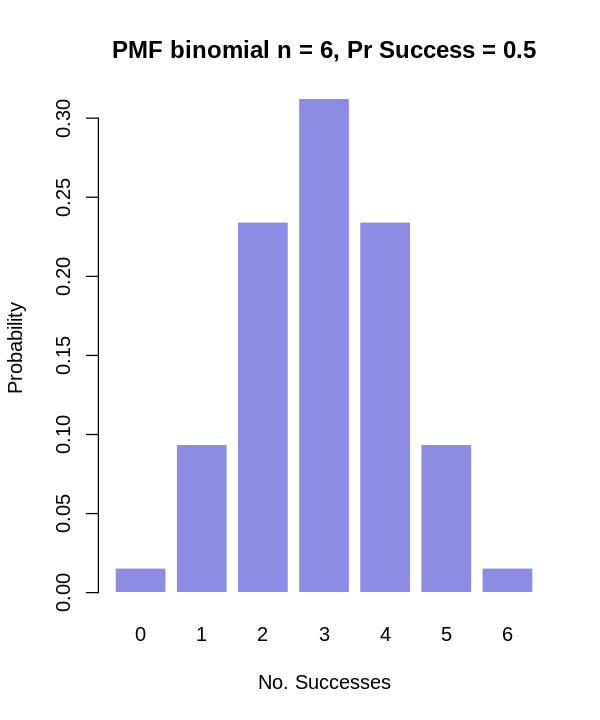

In [6]:
options(repr.plot.height=6, repr.plot.width=5)

successes = 0:6
barplot(dbinom(successes, 6, 0.5) ~ successes, border=F,
    col=rgb(0.1,0.1,0.8,0.5),
    xlab='No. Successes', ylab= 'Probability', 
    main='PMF binomial n = 6, Pr Success = 0.5')

The CDF (cumulative distribution function) expresses the probability of a given number of successes OR less:

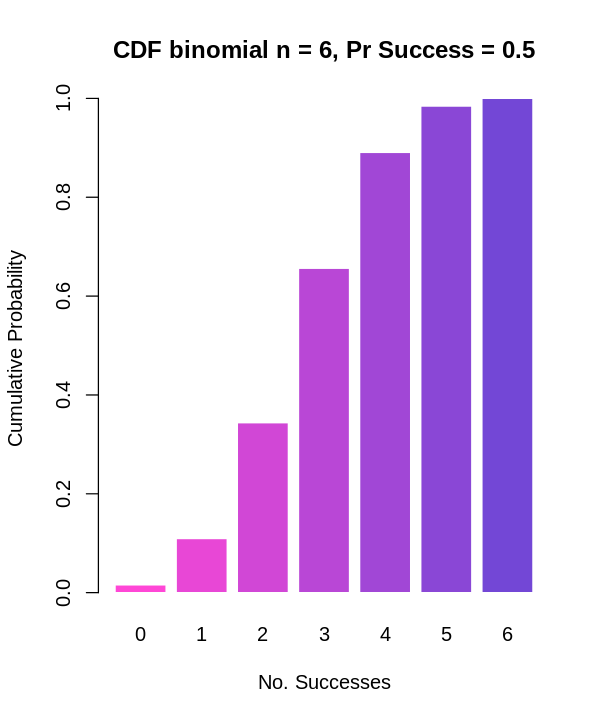

In [7]:
successes = 0:6
barplot(pbinom(successes, 6, 0.5) ~ successes, border=F,
    col=c(rgb(seq(1,.1,by=-(0.9-0.1)/length(successes)),0.1,0.8,0.8)),
    xlab='No. Successes', ylab= 'Cumulative Probability', 
    main='CDF binomial n = 6, Pr Success = 0.5')

An interesting thing about the binimial is that as $m \to \infty$ it converges to the Normal, even though the binomial is a discrete distribution and the normal is continuous. This is the justification for the normal approximation of the binomial when $n \; p > 5$ and $n \; q > 5$. 

As a reminder the mean will be the mean of the binomial, e.g. $n\,p,$ and the SD also the binomial, $\sqrt{n\,p\,q}.$

We start seeing this just with $n=100$ trials: 

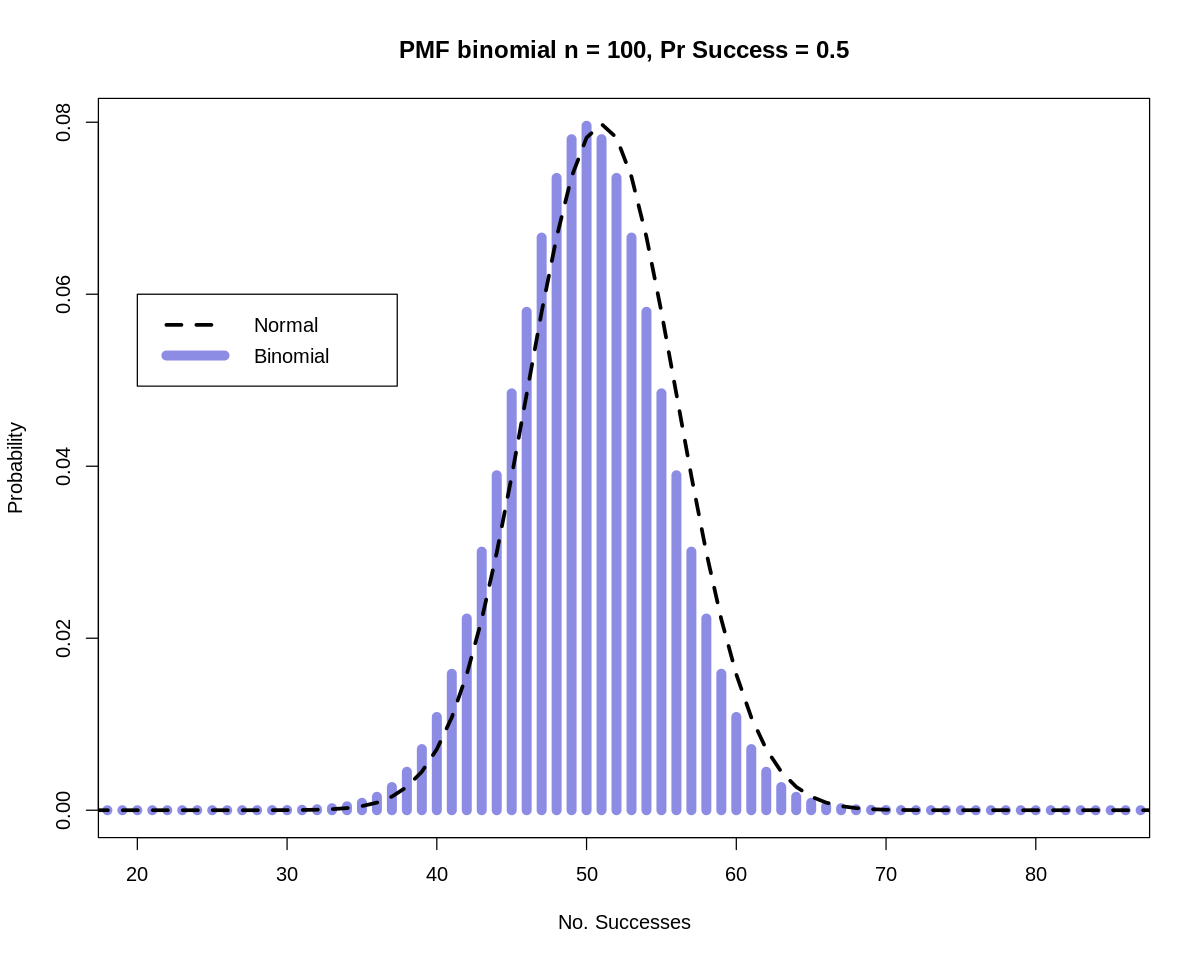

In [8]:
options(repr.plot.height=8, repr.plot.width=10)
n = 100
successes = 0:n
p = 0.5
plot(successes, dbinom(successes, n, p), type='h', lwd=8,
    xlim=c(20,85),   
    col=rgb(0.1,0.1,0.8,0.5),
    xlab='No. Successes', ylab= 'Probability', 
    main='PMF binomial n = 100, Pr Success = 0.5')

mu = n * p
sig = sqrt(n * p * (1 - p))
lines(dnorm(successes, mu, sig), lty = 2, lwd=3)
legend(20, 0.06, c("Normal", "Binomial"), lty=c(2,1), lwd=c(3,8), col=c('black',rgb(0.1,0.1,0.8,0.5)))

> Given a normal distribution with $\mu=35$ and $\sigma=6$​, find​ (a) the normal curve area to the right of $x=19$​; ​(b) the normal curve area to the left of $x=28$​; ​(c) the normal curve area between $x=37$ and $x=48$​; ​(d) the value of x that has $80\%$ of the normal curve area to the​ left; and​ (e) the two values of x that contain the middle $​85\%$ of the normal curve area.

In [9]:
options(repr.plot.height=7, repr.plot.width=7)

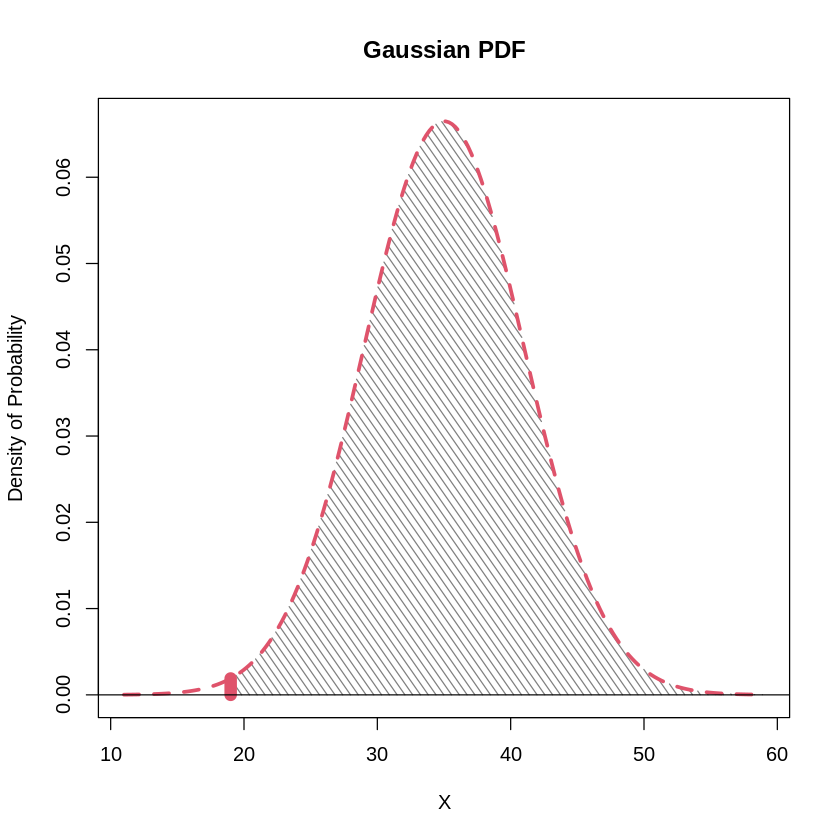

In [10]:
mu = 35
sigma = 6
lim = 4 * sigma
X = seq(mu - lim, mu + lim, length=200)
Y = dnorm(X, mean=mu, sd=sigma)
plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability')

# To paint (a) the normal curve area to the right of  x=19:

x = seq(19, mu + lim, length=100)
y = dnorm(x, mu, sd=sigma)

polygon(c(19,x), c(0,y), border=F, col = rgb(0,0,0,.5),
  density = 20, angle = 125)

lines(X, Y, lwd=3, lty=2, col = 2)
segments(19,0,19,dnorm(19, mu, sigma), lwd=10, col=2)
abline(h=0)

In [11]:
# The answer is:

1 - pnorm(19, mu, sigma)

[1] 0.9961696

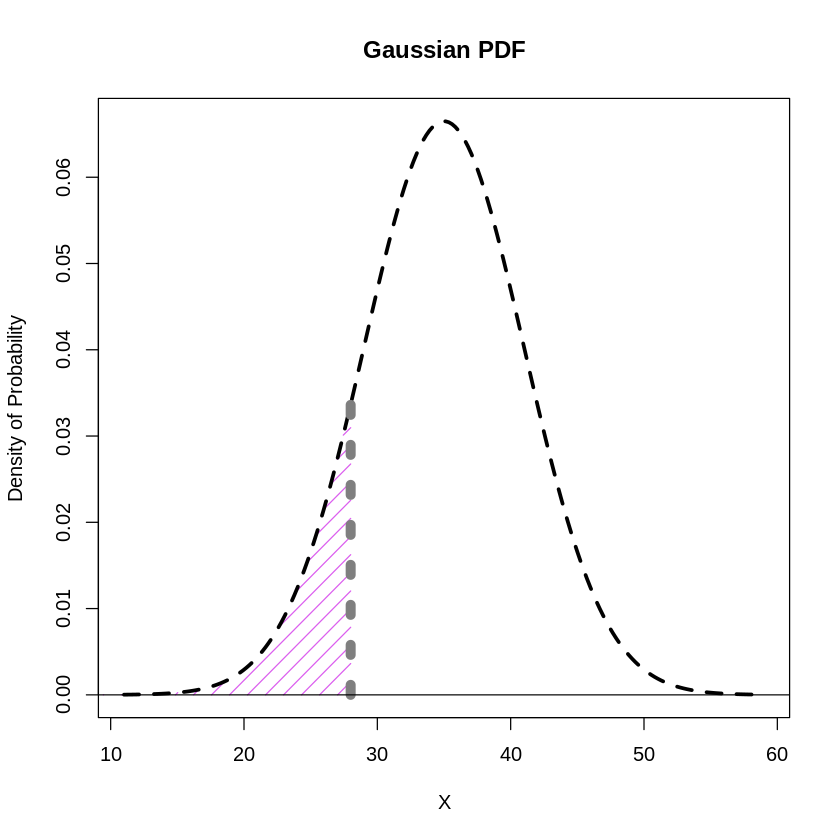

In [12]:
# b) the normal curve area to the left of  x=28:
plot(X, Y, type="n", lwd=2, main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(mu - lim, 28, length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(- lim, x, 28), c(0, y, 0), col=c(rgb(0.8,0.1,0.9,0.7)), 
  density = 10, angle = 45, border=F)
lines(X, Y, lwd=3, lty=2)
segments(28,0,28,dnorm(28, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
abline(h=0)

In [13]:
# Then answer is

pnorm(28, mu, sigma)

[1] 0.1216725

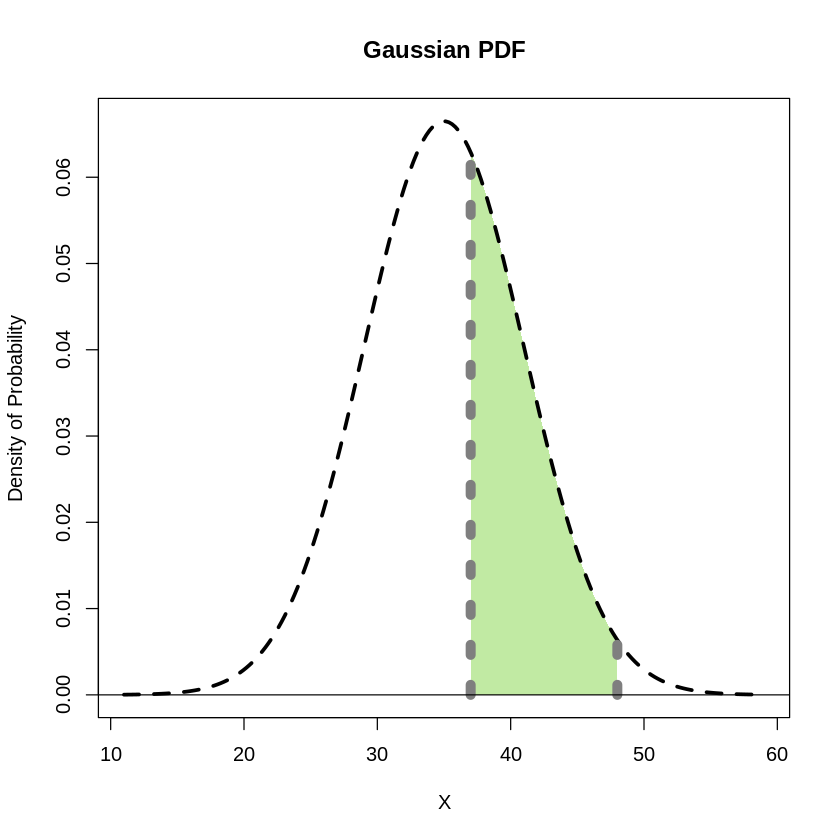

In [14]:
# (c) the normal curve area between  x=37  and  x=48 ​
plot(X, Y, type="n", lwd=2, main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(37, 48, length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(37, x, 48), c(0, y, 0), col=c(rgb(0.4,0.8,0.1,0.4)), border = F)
lines(X, Y, lwd=3, lty=2)
segments(37,0,37,dnorm(37, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
segments(48,0,48,dnorm(48, mean=mu, sd=sigma), lwd=8, col='gray50', lty=3)
abline(h=0)

In [15]:
# The answer is

pnorm(48, mu, sigma) - pnorm(37, mu, sigma)

[1] 0.3543112

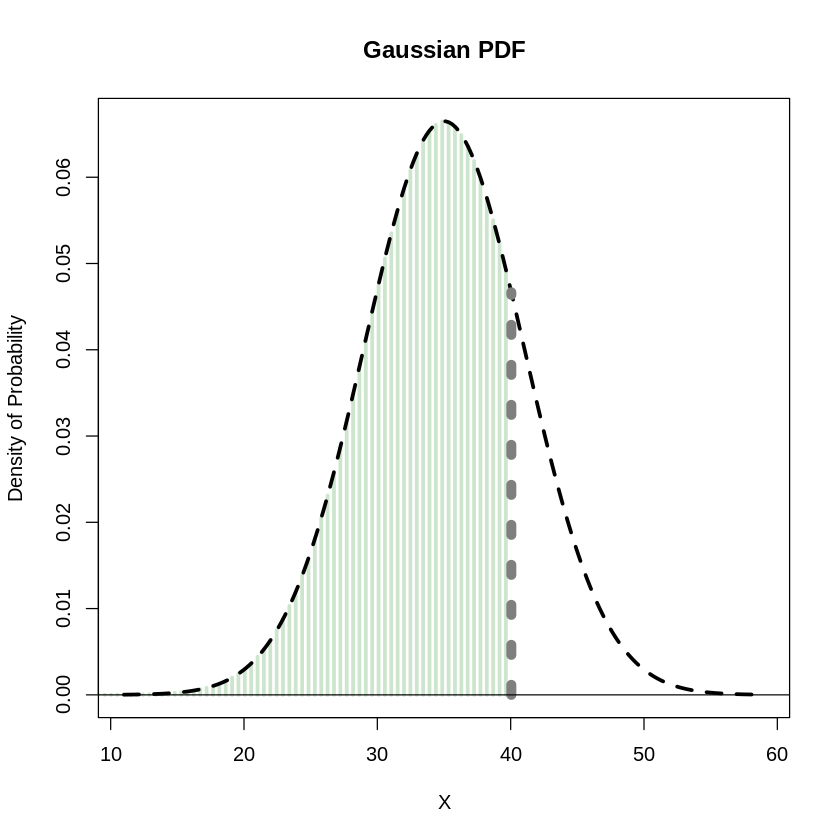

In [16]:
# ​(d) the value of x that has  80%  of the normal curve area to the​ left
plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability')
x = seq(-lim, qnorm(0.8,mu,sigma), length=100)
y = dnorm(x, mean=mu, sd=sigma)
polygon(c(-lim, x, qnorm(0.8,mu,sigma)), c(0, y, 0), col=rgb(0,0.5,0,0.2), border=F, lwd=3,
    density = 20, angle = 90)
lines(X, Y, lwd=3, lty=2)
segments( qnorm(0.8,mu,sigma),0, qnorm(0.8,mu,sigma), dnorm( qnorm(0.8,mu,sigma), mean=mu, sd=sigma), 
  lwd=8, col='gray50', lty=3)
abline(h=0)

In [17]:
# Here we are looking for the QUANTILE (THE VALUE OF X), not the area under the curve, which is given as 80%

qnorm(0.8, mu, sigma)

[1] 40.04973

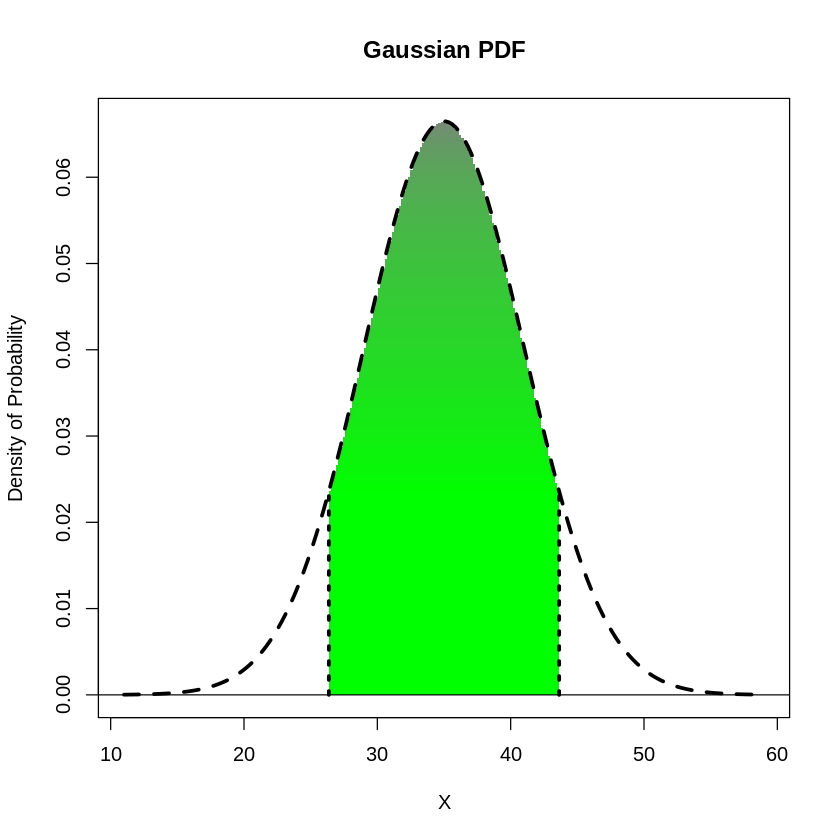

In [18]:
# e) the two values of x that contain the middle  ​85%  of the normal curve area.
tails = (1 - 0.85) / 2

plot(X, Y, type="n", main = "Gaussian PDF", xlab='X', ylab='Density of Probability', lwd=5)
xx = seq(qnorm(tails,mu,sigma), qnorm(1 - tails,mu,sigma), length=100)
yy = dnorm(xx, mean=mu, sd=sigma)

l = length(xx)

for(i in 1:l){
  polygon(c(xx[i], rev(xx)[i], rev(xx)[i], xx[i]), c(rep(0,l)[i], rep(0,l)[i], rev(yy)[i], yy[i]), 
          col=rgb(1 - 1/l * i, 1/l * i, 1 - 1/l * i, 1 - 0.1/l *i), border=F)
}

lines(X, Y, lwd=3, lty=2)
segments( qnorm(tails,mu,sigma),0, qnorm(tails,mu,sigma),dnorm( qnorm(tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
segments( qnorm(1-tails,mu,sigma),0, qnorm(1-tails,mu,sigma),dnorm( qnorm(1-tails,mu,sigma), mean=mu, sd=sigma), lwd=3, lty=3)
abline(h=0)

In [19]:
# Again asking for quantiles, not probabilities, which are given
# The lowest quantile corresponds to leaving 1/2 of 1 - 85 % of the probability to the left:
qnorm(tails, mu, sigma)
# The highest value is the quantile that leaves the same probability to the right (upper tail):
qnorm(1 - tails, mu, sigma)

[1] 26.36281

[1] 43.63719

> Find the 99% confidence interval of the proportion of defective connecting tubings if the standard deviation $\sigma = 0.0015$ and the proportion $\hat p = 0.312$ in a sample of $n=85.$

In [20]:
p.hat = 0.312
n = 85
sigma = 0.0015
alpha = 1 - 0.99
CI = p.hat + c(-1,1) * qnorm(alpha/2) * sigma / sqrt(n)
round(CI,4)

[1] 0.3124 0.3116

> The mean of something or other is $\hat x=75.2$ in a sample of $n=13$ with a standard deviation $s = 7.3.$ Construct the $95\%$ CI

In [21]:
xhat = 75.2
n = 13
s = 7.3
alpha = 1 - 0.95
CI = xhat + c(1,-1) * qt(alpha/2, n-1) * s / sqrt(n)
round(CI,4)

[1] 70.7887 79.6113

> Estimate the $90\%$ CI for the population mean given the following sample:

In [22]:
sam = c(1.01,0.96,0.96,1.04,0.98,0.95,1.03,1.01,1.01)

xbar = mean(sam)
n = length(sam)
sd = sd(sam)
alpha = 1 - 0.90
CI = xbar + c(1,-1) * qt(alpha/2, n-1) * sd / sqrt(n)
round(CI,4)

[1] 0.9741 1.0148

> Estimate the $99\%$ CI for the population proportion given that $219$ defective items were found in a sample of $1,000.$

In [23]:
# First method:

p.hat = 219/1000
n = 1000
alpha = 1 - 0.99
CI = p.hat + c(1,-1) * qnorm(alpha/2) * sqrt((p.hat*(1-p.hat))/n)
round(CI,4)

[1] 0.1853 0.2527

In [24]:
# Second method:

p = 219/1000
n = 1000
zaltwo = qnorm(alpha/2)
ker =  (p + zaltwo^2/(2*n)) / (1 + zaltwo^2/n)
me = zaltwo/(1 + zaltwo^2/n) * sqrt(p*(1-p)/n + zaltwo^2/(4*n^2))
CI = ker + c(1,-1) * me
round(CI,4)

[1] 0.1872 0.2545

> Calculate the size of the sample necessary for a CI with a margin of error of $0.04$:

In [25]:
pest=0.5 # This is not know. Just a random guess.
n = (((qnorm(0.1/2))*sqrt(pest*(1-pest)))/0.04)^2
round(n)

[1] 423

> Calculate the  $98\%$ confidence interval of the population variance given that $s = 16$ in a sample of $n=16.$

If the population is normallly distributed and for a sample of size $n$ 

$$\chi^2_{n-1}\sim\frac{(n-1)s^2}{σ^2}$$ 

is distributed as a chi (/kai/) square $χ^2$ with $n-1$ degrees of freedom. 

Therefore 

$$\frac{(n-1)s^2}{\chi^2_{n-1}(1 -\frac {\alpha}{2})}\leq \sigma^2 \leq \frac{(n-1)s^2}{\chi^2_{n-1}(\frac \alpha 2)}$$

The $95\%$ confidence interval cannot be calculated with the `+ c(-1,1)` R stats hack used for symmetrical (i.e. bell-shaped) distributions because the chi square PDF is asymmetric as in the plot below. So we need to calculate independently the quantiles $\chi^2_{n-1}(1 -\frac {\alpha}{2})$ and $\chi^2_{n-1}(\frac \alpha 2).$

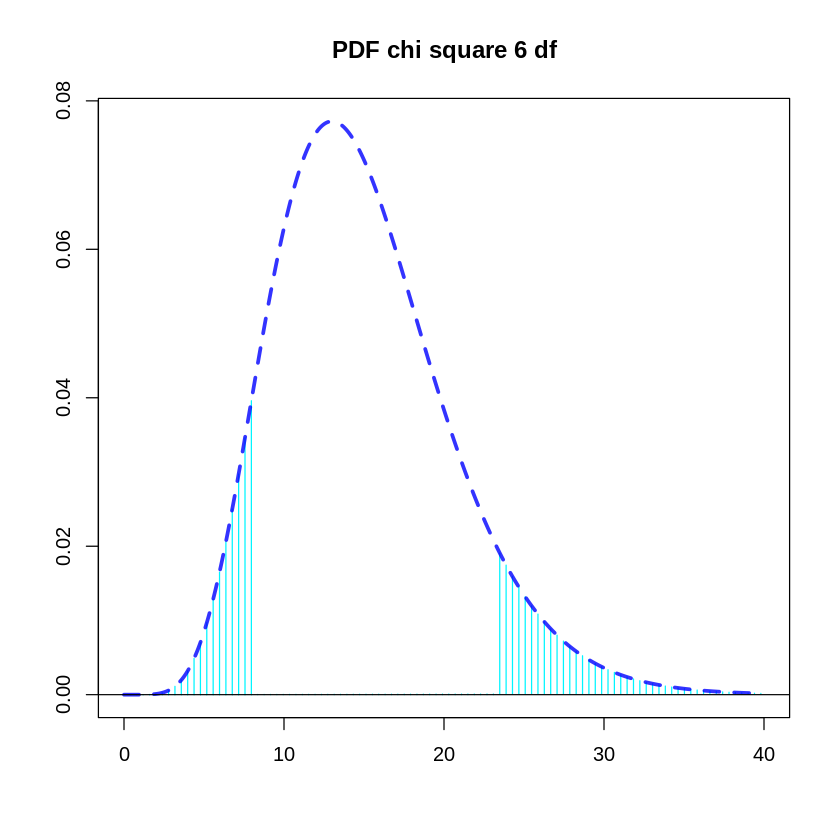

In [26]:
n = 16
x = seq(0, 40, 0.001)
y = dchisq(x, n - 1)
plot(x, y, type='n', lwd=2,  main='PDF chi square 6 df', xlab='',ylab='')

tail = (1 - 0.85) / 2

xprime = seq(0, qchisq(tail, n - 1), length=100)
yprime = dchisq(xprime, n - 1)
polygon(c(0, xprime, qchisq(tail, n - 1)), c(0, yprime, 0), col='turquoise1', 
    density=20, angle=90, border=F)

xprime = seq(qchisq(1 - tail, n - 1), tail(x,1), length=100)
yprime = dchisq(xprime, n - 1)
polygon(c(qchisq(1 - tail, n - 1), xprime, 0), c(0, yprime, 0), col='turquoise1',  
    density=20, angle=90, border=F)

lines(x, y, lwd=3, lty=2, col=rgb(0,0,1,0.8))
abline(h=0)

The alpha risk is in the exercise $98 \% /2 = 0.98/2.$

Because the $\chi^2$ quantile is in the denominator, the upper tail value will be in the calculation of the lower bound of the CI.

In [27]:
n = 16
k = n - 1
alpha = 1 - 0.98
a= qchisq(alpha/2,k)
b= qchisq(1-(alpha/2),k)
s = 16
print(paste('The 98% CI for the population variance is between ', ((n-1) * s) / b, ' and ', ((n-1) * s) / a))

[1] "The 98% CI for the population variance is between  7.84880220050635  and  45.8948150753099"


> A coin is tossed 576 times. Use the normal curve approximation to find the probability of obtaining
​(a) between 269 and 302 heads​ inclusive;
​(b) exactly 291 ​heads.

Whenever it is a set up with heads or tails (or 'success' / 'failure') with the experiment repeated a bunch of times to count the number of heads (or 'successes') it is a binomial distribution. As above, when the number of experiments is large we can approximate with the normal. The test to see if we can actually pull off the approximation is $n\,p > 5$ and $n \, q > 5.$ This is the case in this problem (assuming a fair coin $p=0.5$) with $n = 576.$

The mean for the normal approximation is:

$$\mu = n\, p$$

and the SD

$$\sigma = \sqrt{n \, p \, (1-p)}$$

In [28]:
# a) between 269 and 302 heads​ inclusive:

n = 576
p = 0.5
mu = n * p
sd = sqrt(n * p * (1  - p))
upper = 302
lower = 269
pnorm(upper, mu, sd) - pnorm(lower - 1, mu, sd) # Minus 1 because we don't want to subtract the probability of 269 exact heads.

# If we had actually used the binomial without the normal approx:

pbinom(upper,n,p) - pbinom(lower - 1,n,p)

[1] 0.8305371

[1] 0.8345157

In [29]:
# exactly 291 ​heads

pnorm(291, mu, sd) - pnorm(290, mu, sd) # We subtract areas under the curve to isolate the value we want.

# If we used the binomial instead:

dbinom(291, n, p)

[1] 0.03252249

[1] 0.03221009

> The heights of a random sample of 40 college students showed a mean of 176.4 centimeters and a standard deviation of  6.7 centimeters.
​(a) Construct a 98​% confidence interval for the mean height of all college students.
​(b) What can we assert with ​98% confidence about the possible size of our error if we estimate the mean height of all college students to be 176.4 ​centimeters?

We talk about a confidence interval for a parameter, with **confidence level** or coefficient $\gamma$. The number $\gamma,$ whose typical value is close to but not greater than $1,$ is sometimes given in the form $1 − \alpha$ (or as a percentage $100\% (1 − α)$), where $\alpha$ is a small non-negative number, most commonly $.05.$

The normal curve is symmetric: half of the area is in the left tail of the curve, and the other half of the area is in the right tail of the curve. For a confidence interval with level $\gamma=95\%=0.95$, the area in each tail of the curve is equal to $\alpha/2 = \frac{1-\gamma}{2}.$ For a $95\%$ confidence interval, the area in each tail is equal to $(1-0.95)/2 = 0.05/2 = 0.025.$

Unfortuanately, in many cases we don't have the standard deviation of the population, and we need to rely on the standard deviation of the sample. That forces us to use the Student t distribution, which has more probability mass at the tails: the fatter tails accounts for more probability of having found a sample with an extremely large standard deviation. This is more so if the sample is small. The smaller the sample, the lower the degrees of freedom that control the Student t distribution ($\text{df }= n -1.$ As the sample tends to $\infty,$ the t distribution will look like the normal.

The **margin of error** of a confidence interval is defined to be the value added or subtracted from the sample mean which determines the length of the interval: 

$$\hat x = Z_{\alpha/2} \frac{s}{\sqrt n}$$


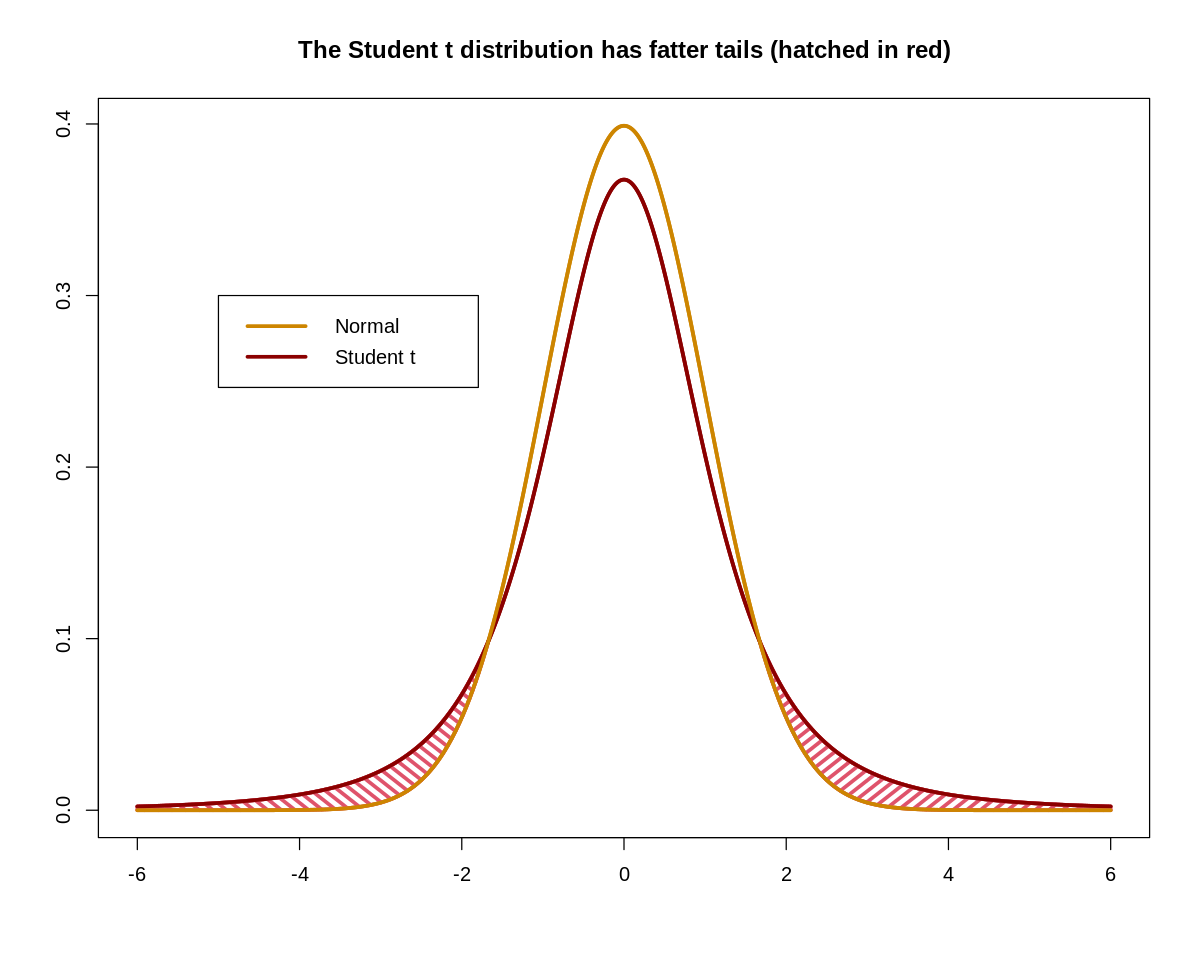

In [30]:
options(repr.plot.height=8, repr.plot.width=10)

x = seq(-6,6,0.001)
y = dnorm(x)
t = dt(x, 3)
plot(x, y, type='l', col='orange3', lwd=3, xlab='', ylab='', main="The Student t distribution has fatter tails (hatched in red)")
lines(x, t, col='red4', lwd=3)
legend(-5,0.3,c('Normal', 'Student t'), lty=c(1,1), lwd=c(3,3),col=c('orange3','red4'))

diff = abs(t - y)

xuppertail = seq(x[which(diff==min(diff))], 6, 0.001)
polygon(c(xuppertail, rev(xuppertail)), c(dt(xuppertail, 3), dnorm(rev(xuppertail))), col=2,
   density=20, angle=45, lwd=3)
xlowtail = seq(-6, -x[which(diff==min(diff))], 0.001)
polygon(c(xlowtail, rev(xlowtail)), c(dt(xlowtail, 3), dnorm(rev(xlowtail))), col=2,
   density=20, angle=135, lwd=3)
lines(x, t, col='red4', lwd=3)
lines(x, y, col='orange3', lwd=3)

For a population with unknown mean  and unknown standard deviation, a confidence interval for the population mean, based on a simple random sample of size $n,$ is 

$$ \bar x \pm \left( \text{t quantile}_{\alpha/2}(\text{df}=n-1)\right) \frac s{\sqrt{n}}$$ 

so $t$ is the upper $(1-\gamma)/2$ critical value for the $t$ distribution with $n-1$ degrees of freedom.

In [31]:
n = 40
xbar = 176.4
s = 6.7
alphahalf = (1 - 0.98)/2

xbar + c(1, -1) * qt(alphahalf, n - 1) * s/sqrt(n)

[1] 173.8302 178.9698

In [32]:
# (b) What can we assert with ​98% confidence about the possible size of our error 
# if we estimate the mean height of all college students to be 176.4 ​centimeters?

# The margin of error is

xbar + abs(qt(alphahalf, n - 1)) * s/sqrt(n)

[1] 178.9698

> A random sample of 13 graduates of a certain secretarial school typed an average of 75.2 words per minute with a standard deviation of 7.3 words per minute. Assuming a normal distribution for the number of words typed per​ minute, find a ​95% confidence interval for the average number of words typed by all graduates of this school.

In [33]:
# Again we don't have the population standard deviation sigma. So we have to do with the sample s (i.e. need Student t distr)

n = 13
xbar = 75.2
s = 7.3
alphahalf = (1 - 0.95) / 2

xbar + c(1, -1) * qt(alphahalf, n - 1) * s/sqrt(n)

[1] 70.78865 79.61135